In [9]:
#İmporting Libs.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Column namelerimizin data'nın docümantasyonundan baktığımız doğru isimleri ile değiştiriyoruz değiştirmediğim halde column isimleri de sayı idi.
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv('magic04.data', names = cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
#class kısımda str girdileri int girdilere çeviriyoruz.
df["class"] = (df["class"] == "g").astype(int) #'g' ye eşit olan değerler 'true' olarak gelicek ve '1'e eşitlenicek 'false' yani 'h' ye sahip olan değerler '0' ile işaretlenicek

In [4]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


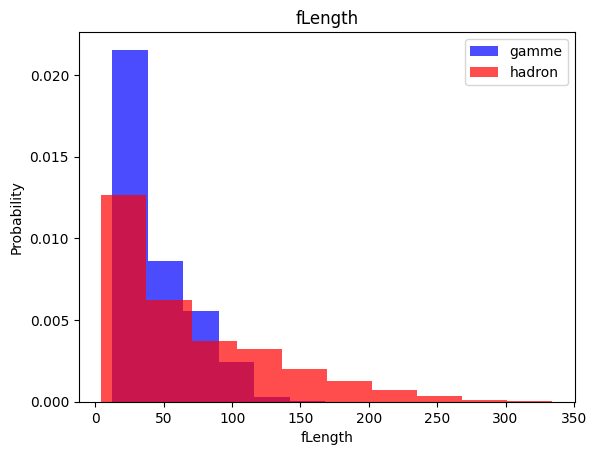

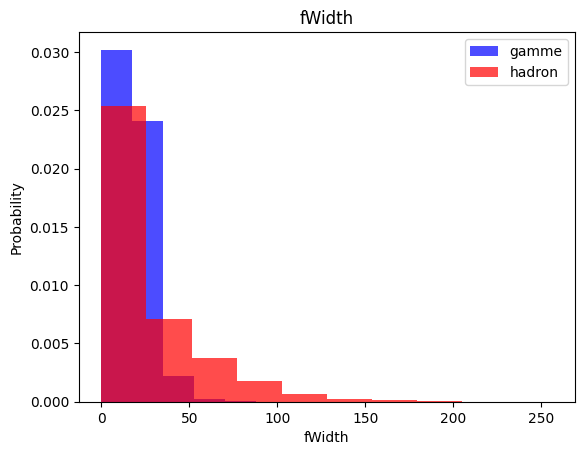

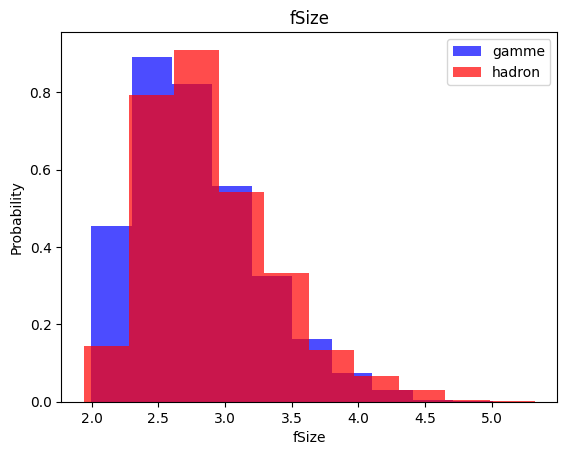

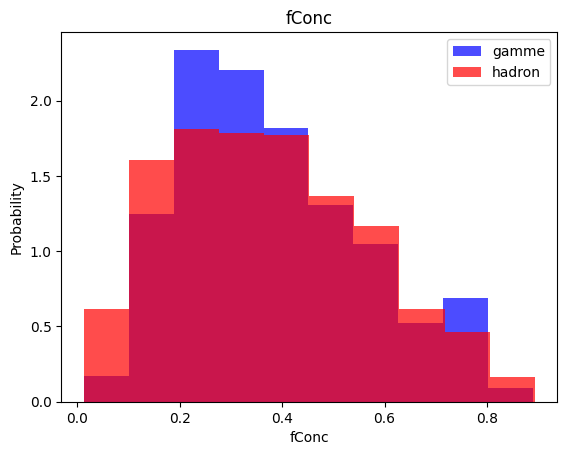

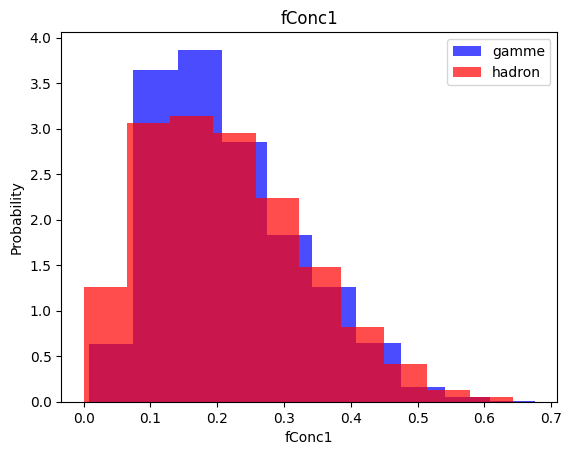

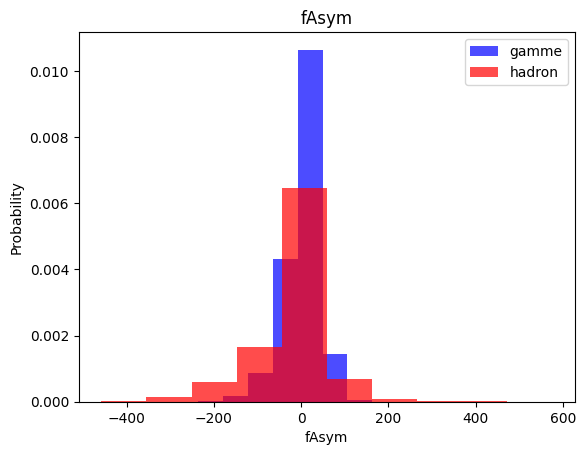

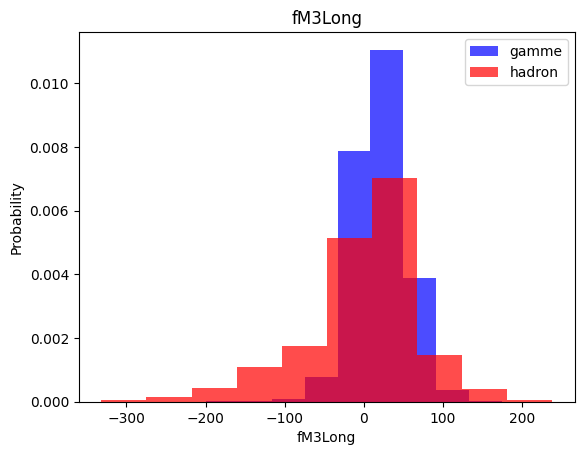

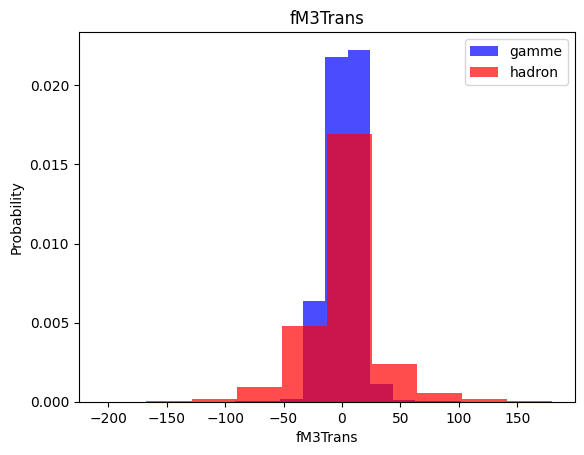

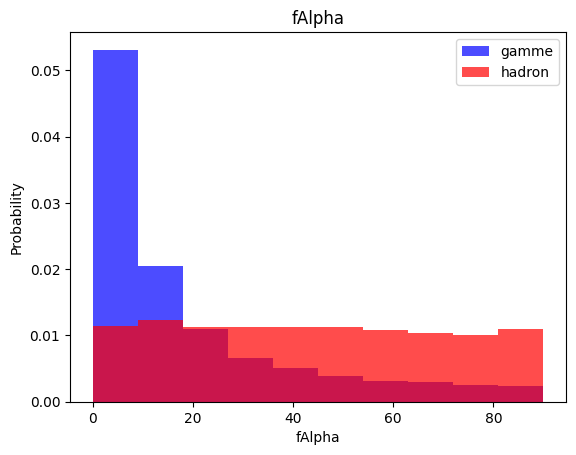

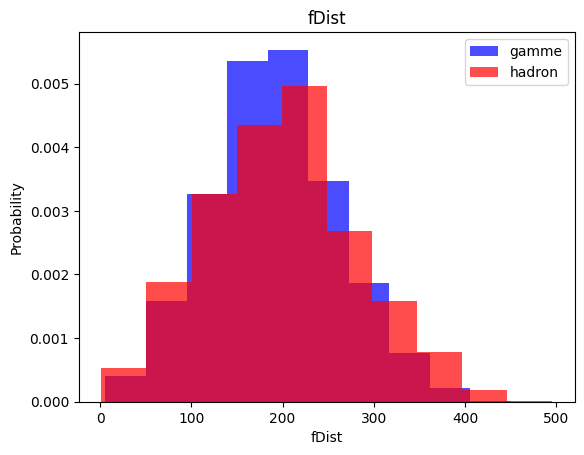

In [10]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color = "blue", label = "gamme", alpha = 0.7, density=True)
  plt.hist(df[df["class"]==0][label], color = "red", label = "hadron", alpha = 0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [11]:
#datamın %60'lık ilk kısımını modelimi eğiteceğim train'e atıyorum %60-%80 arasını datamın doğrulamasını yapcağım valid'e atıyorum geri kalanının modelimi test edeceğim test'e atıyorum
train, valid, test = np.split(df.sample(frac=1), [int(0.6 * len(df)), int(0.8 * len(df))])

In [12]:
X = df[cols[:-1]].values
print(X)
print("---*-*-*-*-----")
print(X[0])

[[ 28.7967  16.0021   2.6449 ...  -8.2027  40.092   81.8828]
 [ 31.6036  11.7235   2.5185 ...  -9.9574   6.3609 205.261 ]
 [162.052  136.031    4.0612 ... -45.216   76.96   256.788 ]
 ...
 [ 75.4455  47.5305   3.4483 ...  -9.4662  30.2987 256.5166]
 [120.5135  76.9018   3.9939 ... -63.8389  84.6874 408.3166]
 [187.1814  53.0014   3.2093 ...  31.4755  52.731  272.3174]]
---*-*-*-*-----
[28.7967 16.0021  2.6449  0.3918  0.1982 27.7004 22.011  -8.2027 40.092
 81.8828]


In [13]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler #alttaki def'imize over sample da ekledik

In [14]:
def scale_dataset(dataFrame, oversample = False):
  X = dataFrame[dataFrame.columns[:-1]].values #üstteki kodda yaptığımız kısımı burda uyguladık
  y = dataFrame[dataFrame.columns[-1]].values #class içindeki değerlerin hepsini sırası ile aldı
  scaler = StandardScaler()
  X = scaler.fit_transform(X) #aldığımız değerleri sclale ettik

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y) #bu bizim değerlerimizi eşitledi

  data = np.hstack((X, np.reshape(y, (-1, 1)))) #yeni X değerlerimiz ile 'y' yani class değerlerimisi birleştirdik.
  #bu kısıdma birleştirme işlemi yaparken X 2d array olduğu için y'yi de 2d array yapmak zorundayım bunun için np.reshape kullnıyorum (-1, 1) bunu 2d array yapar
  return data, X,  y

In [15]:
print(len(train)) #%60
print(len(valid)) #%20
print(len(test))  #%20

11412
3804
3804


In [16]:
#Oversampling yapmadan önceki değerlerim aralarında çok fark var bunları yaklaştırmak için over sampling yapıyoruz.
print(len(train[train["class"] == 1])) #gamme
print(len(train[train["class"] == 0])) #hedron

7432
3980


In [17]:
train, X_train, y_train = scale_dataset(train, oversample = True)

In [26]:
valid, X_valid, y_valid = scale_dataset(valid, oversample = False) #bunlar ile model eğitmiyicağim için oversamplig yapmama gerek yok false veriyorum.
test, X_test, y_test = scale_dataset(test, oversample = False)

In [24]:
len(train)

14864

In [22]:
sum(y_train == 1)

7432

In [23]:
sum(y_train == 0)

7432

In [18]:
print(train[0])
print("-*-*-*-*-")
print(X_train[0])
print("-*-*-*-*-")
print(y_train[0])

[-0.6463654  -0.31576058 -0.65014875  0.65951332  0.79839957  0.05548392
  0.29217772  0.83807128 -1.01566493 -0.10753916  0.        ]
-*-*-*-*-
[-0.6463654  -0.31576058 -0.65014875  0.65951332  0.79839957  0.05548392
  0.29217772  0.83807128 -1.01566493 -0.10753916]
-*-*-*-*-
0


In [33]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [28]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [29]:
y_pred = knn_model.predict(X_test)

In [30]:
y_pred

array([1, 0, 1, ..., 0, 0, 1])

In [31]:
y_test

array([1, 0, 1, ..., 0, 0, 1])

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.68      0.73      1346
           1       0.84      0.90      0.87      2458

    accuracy                           0.82      3804
   macro avg       0.81      0.79      0.80      3804
weighted avg       0.82      0.82      0.82      3804



accuracy == > %82 oranla doğru bildiğimizi gösterir.
precision(kesinlik) == >  